# ML for science - Unfold
## Baudoin von Sury - Pierre Vuillecard - Hugo Birch

## This notebook present the different predictions of average CL and average CP using regression maching learning method.

We used the sklearn python librairy (https://scikit-learn.org) to perform different regression on our data.

- Part 1 : Prediction of average CP from kinematic alpha
- Part 2 : Prediction of average CL from kinematic alpha

In [1]:
# importation of different librairies
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import probplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate

from helpers import*
from regression import*

# Set the seed
np.random.seed(123)

In [2]:
# Definition of the path of the data
path = os.getcwd()
path = path + '/ml_data/complete/complete/'

# Part 1 : Prediction of average CP from kinematic alpha

In [3]:
# Load the data (CP and kinematic alphas for the N_EXP experiments)
N_EXP = 4100
CP = load_data(path,N_EXP, cl = False)

# Shuffle the data
random_permuted_indices = np.random.permutation(N_EXP)
CP = CP[random_permuted_indices,:,:]

### Base line linear regression
We first apply linear on the data with as input the alpha kinematic (200) and as output CP average (1).


In [4]:
# Cross validation on the data set with a linear regression
mse_te ,mse_tr = simple_cv(CP)
print(f"MSE train = {mse_tr} | MSE test = {mse_te}")

MSE train = 0.05076312885524459 | MSE test = 0.07964346201105005


### Implementation of the regularized linear regression

To prevent overfitting, we try to implement a regularizer alpha using the norm L2 of the weights w. In order to choose the value of alpha, we do a cross validation for different value of the regularizer.

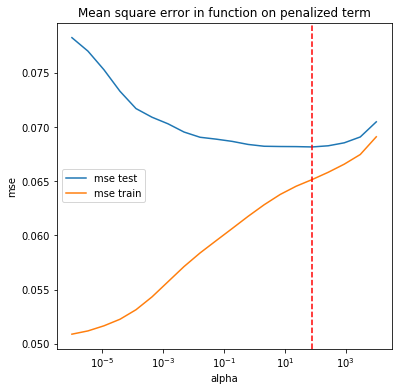

In [6]:
# Set regularizer to different values
alphas = np.logspace(-6, 4, 20)
# Run cross validation
mse_te ,mse_tr = average_cv_regularization(CP,alphas)

# Plot the results
plt.figure(figsize=(6,6))
plt.semilogx(alphas , mse_te, label = "mse test")
plt.semilogx(alphas , mse_tr , label = "mse train")
plt.legend()
plt.title("Mean square error in function on penalized term")
plt.xlabel("alpha")
plt.ylabel("mse")
plt.axvline(x=alphas[np.argmin(mse_te)],linestyle ='--',label='optimal alpha',c='red')
plt.show()

###### The plot above shows us that a regularized term is necessary. The vertical red dot lines indicate the smallest mse value. In the following cell, we are going to run the same cross validation but now we are looking at the value of R2 and not the mse.

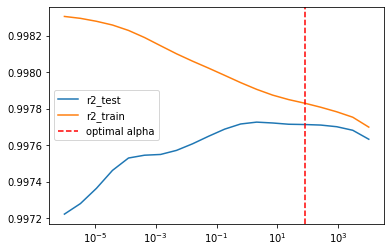

In [8]:
alphas = np.logspace(-6, 4, 20)
y = np.mean(CP[:,1,:] , axis = 1)
X = CP[:,0,:]
r2_score_test = []
r2_score_train = []

for alpha in alphas:
    ridgereg = Ridge(alpha=alpha,normalize=False)
    score = cross_validate(ridgereg , X , y , cv = 4, scoring = "r2", return_train_score = True)
    r2_score_test.append(np.mean(score['test_score']))
    r2_score_train.append(np.mean(score['train_score']))

plt.figure()
plt.semilogx(alphas,r2_score_test, label ="r2_test")
plt.semilogx(alphas,r2_score_train, label = "r2_train")
plt.axvline(x=alphas[np.argmin(mse_te)],linestyle ='--',label='optimal alpha',c='red')
plt.legend()
plt.show()

###### The plot above shows us that it is actually interresting to take a regularized term to increase the performance of the model. As a good trade off between prevent underfitting and maximize R2 score, we choose alpha = 78.476.

In [32]:
print(f" The best alpha is {alphas[np.argmin(mse_te)]} with a mse of : {mse_te[np.argmin(mse_te)]}")

 The best alpha is 0.6158482110660255 with a mse of : 0.07192451992088775


### Improving the results by adding extended feautures x^2.
We are now going to try to improve our results by adding the extended features. We are also applying the same method as above to find a regularized term. 

In [20]:
mse_te ,mse_tr = simple_cv(CP, degree =2)
print(f"MSE train = {mse_tr} | MSE test = {mse_te}")

MSE train = 0.02054426894838808 | MSE test = 0.052627984928229225


We then apply a cross validation on the data for the extended matrix.

In [22]:
alphas = np.logspace(-6, 4, 20)
mse_te ,mse_tr = average_cv_regularization(CP,alphas, degree = 2)

/Users/Baudoin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.66078e-18): result may not be accurate.
  overwrite_a=True).T
/Users/Baudoin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.72467e-18): result may not be accurate.
  overwrite_a=True).T
/Users/Baudoin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.92505e-18): result may not be accurate.
  overwrite_a=True).T
/Users/Baudoin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.90631e-18): result may not be accurate.
  overwrite_a=True).T
/Users/Baudoin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.17056e-18): result may not be accurate.
  overwrite_a=True).T
/Users/Baudoin/

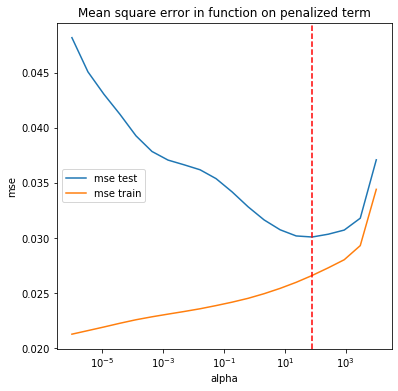

In [24]:
# Plot of the results
plt.figure(figsize=(6,6))
plt.semilogx(alphas , mse_te, label = "mse test")
plt.semilogx(alphas , mse_tr , label = "mse train")
plt.legend()
plt.title("Mean square error in function on penalized term")
plt.xlabel("alpha")
plt.ylabel("mse")
plt.axvline(x=alphas[np.argmin(mse_te)],linestyle ='--',label='optimal alpha',c='red')
plt.show()

In [26]:
print("The best mse is = ", rmse_te[np.argmin(mse_te)] ,"for alpha = ",alphas[np.argmin(mse_te)] )

The best mse is =  0.030104129175665836 for alpha =  78.47599703514607


# Part 2 : Prediction of CL average from kinematic alpha

In [27]:
# Load the data (CP and kinematic alphas for the N_EXP experiments)
N_EXP = 4100
CL = load_data(path,N_EXP, cl = True)

# Shuffle the data
random_permuted_indices = np.random.permutation(N_EXP)
CL = CL[random_permuted_indices,:,:]

### Base line linear regression
We first apply linear on the data with as input the alpha kinematic (200) and as output CL average (1).


In [28]:
# Cross validation on the data set with a linear regression
mse_te ,mse_tr = simple_cv(CL)
print(f"MSE train = {mse_tr} | MSE test = {mse_te}")

MSE train = 0.05332304927993162 | MSE test = 0.08808379143232394


### Implementation of the regularized linear regression

To prevent overfitting, we try to implement a regularizer alpha using the norm L2 of the weights w. In order to choose the value of alpha, we do a cross validation for different value of the regularizer.

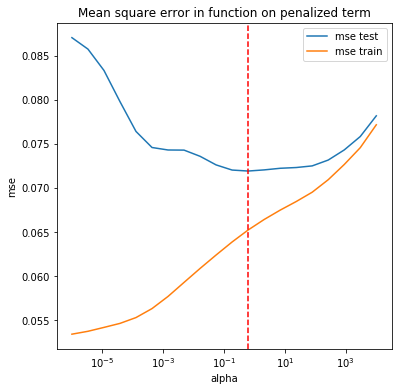

In [29]:
# Set regularizer to different values
alphas = np.logspace(-6, 4, 20)
# Run cross validation
mse_te ,mse_tr = average_cv_regularization(CL,alphas)

# Plot the results
plt.figure(figsize=(6,6))
plt.semilogx(alphas , mse_te, label = "mse test")
plt.semilogx(alphas , mse_tr , label = "mse train")
plt.legend()
plt.title("Mean square error in function on penalized term")
plt.xlabel("alpha")
plt.ylabel("mse")
plt.axvline(x=alphas[np.argmin(mse_te)],linestyle ='--',label='optimal alpha',c='red')
plt.show()

###### The plot above shows us that a regularized term is necessary. The vertical red dot lines indicate the smallest mse value. In the following cell, we are going to run the same cross validation but now we are looking at the value of R2 and not the mse.

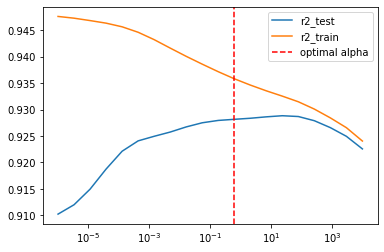

In [31]:
alphas = np.logspace(-6, 4, 20)
y = np.mean(CL[:,1,:] , axis = 1)
X = CL[:,0,:]
r2_score_test = []
r2_score_train = []
for alpha in alphas:
    ridgereg = Ridge(alpha=alpha,normalize=False)
    score = cross_validate(ridgereg , X , y , cv = 4, scoring = "r2", return_train_score = True)
    r2_score_test.append(np.mean(score['test_score']))
    r2_score_train.append(np.mean(score['train_score']))

plt.figure()
plt.semilogx(alphas,r2_score_test, label ="r2_test")
plt.semilogx(alphas,r2_score_train, label = "r2_train")
plt.axvline(x=alphas[np.argmin(mse_te)],linestyle ='--',label='optimal alpha',c='red')
plt.legend()
plt.show()

In [33]:
print(f" The best alpha is {alphas[np.argmin(mse_te)]} with a mse of : {mse_te[np.argmin(mse_te)]}")

 The best alpha is 0.6158482110660255 with a mse of : 0.07192451992088775


### Improving the results by adding extended feautures x^2.
We are now going to try to improve our results by adding the extended features. We are also applying the same method as above to find a regularized term. 

In [35]:
mse_te ,mse_tr = simple_cv(CL, degree =2)
print(f"MSE train = {mse_tr} | MSE test = {mse_te}")

MSE train = 0.0033694061276925043 | MSE test = 0.009012304916551174


We then apply a cross validation on the data for the extended matrix.

In [36]:
alphas = np.logspace(-6, 4, 20)
mse_te ,mse_tr = average_cv_regularization(CL,alphas, degree = 2)

/Users/Baudoin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.25886e-18): result may not be accurate.
  overwrite_a=True).T
/Users/Baudoin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.91401e-19): result may not be accurate.
  overwrite_a=True).T
/Users/Baudoin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.31145e-18): result may not be accurate.
  overwrite_a=True).T
/Users/Baudoin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.70394e-18): result may not be accurate.
  overwrite_a=True).T
/Users/Baudoin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.9959e-18): result may not be accurate.
  overwrite_a=True).T
/Users/Baudoin/a

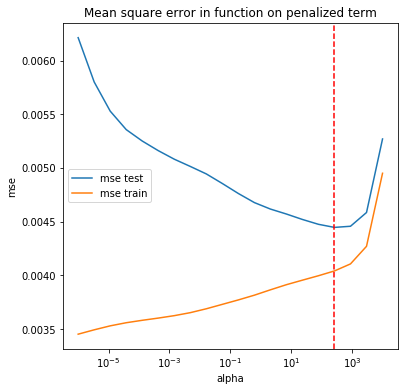

In [37]:
# Plot of the results
plt.figure(figsize=(6,6))
plt.semilogx(alphas , mse_te, label = "mse test")
plt.semilogx(alphas , mse_tr , label = "mse train")
plt.legend()
plt.title("Mean square error in function on penalized term")
plt.xlabel("alpha")
plt.ylabel("mse")
plt.axvline(x=alphas[np.argmin(mse_te)],linestyle ='--',label='optimal alpha',c='red')
plt.show()

In [38]:
print("The best mse is = ", rmse_te[np.argmin(mse_te)] ,"for alpha = ",alphas[np.argmin(mse_te)] )

The best mse is =  0.030358083866205192 for alpha =  263.6650898730355


# Conclusion :
We then choose for CP average :
- degree = 2
- regularizer term alpha = 78.476

The Best MSE = 0.0301

And for CL :
- degree = 2
- regularizer term alpha = 263.665

The Best MSE is = 0.030358